<a href="https://colab.research.google.com/github/HelmieAnalytics/xardata/blob/main/XarData_v2_0_2_ranker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Delete files in directories

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import os

# Specify the desired directory path
directory_path = "/content/drive/MyDrive"

# Change the current working directory
os.chdir(directory_path)

# Verify that the working directory has been updated
print("Current working directory:", os.getcwd())

Current working directory: /content/drive/MyDrive


In [ ]:

import os
import glob

# Base directory containing the folders
base_dir = '/content/drive/MyDrive/'
exclude_subdir = ''  # Name of the subdirectory to exclude

# Find all subdirectories within the base directory
subdirs = [d for d in glob.glob(os.path.join(base_dir, '*')) if os.path.isdir(d)]

# Iterate over each subdirectory and delete all files within them, except the excluded subdirectory
for subdir in subdirs:
    if os.path.basename(subdir) == exclude_subdir:
        continue  # Skip the excluded subdirectory
    files = glob.glob(os.path.join(subdir, '*'))  # Get all files in the subdirectory
    for file in files:
        try:
            os.remove(file)  # Delete the file
            print(f"Deleted {file}")
        except Exception as e:
            print(f"Error deleting {file}: {e}")

In [ ]:

import shutil
import os

def delete_folder(folder_path):
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)
        print(f"Deleted folder: {folder_path}")
    else:
        print(f"Folder not found: {folder_path}")

# Example usage
folder_path = '/content/drive/MyDrive/'
delete_folder(folder_path)

In [ ]:

import os

def delete_files_except_specific(directory, excluded_files, excluded_folders):
    """
    Deletes all files in the specified directory except for the ones listed in `excluded_files`.
    Args:
        directory (str): Path to the directory.
        excluded_files (list): List of filenames to exclude.
        excluded_folders (list): List of folder names to exclude.
    """
    for root, dirs, files in os.walk(directory):
        # Exclude specific folders
        dirs[:] = [d for d in dirs if d not in excluded_folders]

        for filename in files:
            if filename not in excluded_files:
                file_path = os.path.join(root, filename)
                os.remove(file_path)

# Example usage:
folder_path = '/content/drive/MyDrive'
files_to_exclude = []  # Add filenames you want to exclude
folders_to_exclude = []  # Add folder names you want to exclude
delete_files_except_specific(folder_path, files_to_exclude, folders_to_exclude)

In [ ]:
# @title

import os

# Check current working directory
print(os.getcwd())

# Attempt to create a test file in the current directory
try:
    with open('test.txt', 'w') as f:
        f.write('This is a test file.')
    print('Test file created successfully.')
except OSError as e:
    print(f'Error creating test file: {e}')

In [ ]:

from PIL import Image

def convert_to_bitmap(input_image_path, output_image_path, new_size, dpi):
    # Open the image file
    with Image.open(input_image_path) as img:
        # Resize the image while maintaining aspect ratio
        img.thumbnail(new_size, Image.ANTIALIAS)

        # Set DPI
        img.info['dpi'] = (dpi, dpi)

        # Convert image to '1' mode for a bitmap (binary) image
        img = img.convert('1')

        # Save the image in bitmap format
        img.save(output_image_path, format='BMP', dpi=(dpi, dpi))
        print(f"Image saved as {output_image_path}")

# Example usage
input_path = "/content/Screenshot_20220923_182855.jpg"  # Replace with your input image file path
output_path = "helmie_research_bitmap.bmp"  # Replace with your desired output file path
size = (200, 200)  # Set the desired size (width, height) for resizing
dpi = 300  # Desired DPI for the output

convert_to_bitmap(input_path, output_path, size, dpi)

Image saved as helmie_research_bitmap.bmp


<ipython-input-55-a0cdd3f1a866>:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(new_size, Image.ANTIALIAS)


###Install packages

In [ ]:
!pip install yfinance

In [ ]:
!pip install yahooquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
#!pip install mpld3

In [ ]:
#!pip install -i https://test.pypi.org/simple/ xardata

###Settings

In [ ]:

import datetime
from datetime import date
import numpy as np

"""
Settings
"""
portfolio_value = 5000.00
perf_last_month = 5000.00

#ranking_day = "2024-07-17"
index_date = 'STX.csv'
ranking_table ="ranking_table_2024-07-17.csv"
portfolio = "portfolio_2024-07-17.csv"
current_portfolio = "current_portfolio.csv"

# Storing today's date into a variable
today = date.today()
# Storing the specific date
trading_day = today
# Calculate percent difference since last month
perf_pct = (portfolio_value / perf_last_month) - 1
# Print performance, format as percent with two decimals.
print("{} - Last Month Result: {:.2%}".format(trading_day, perf_pct))
# Remember today's portfolio value for next month's calculation
#perf_last_month = portfolio_value

###Import Benchmark Data

<ipython-input-83-6febfe068174>:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


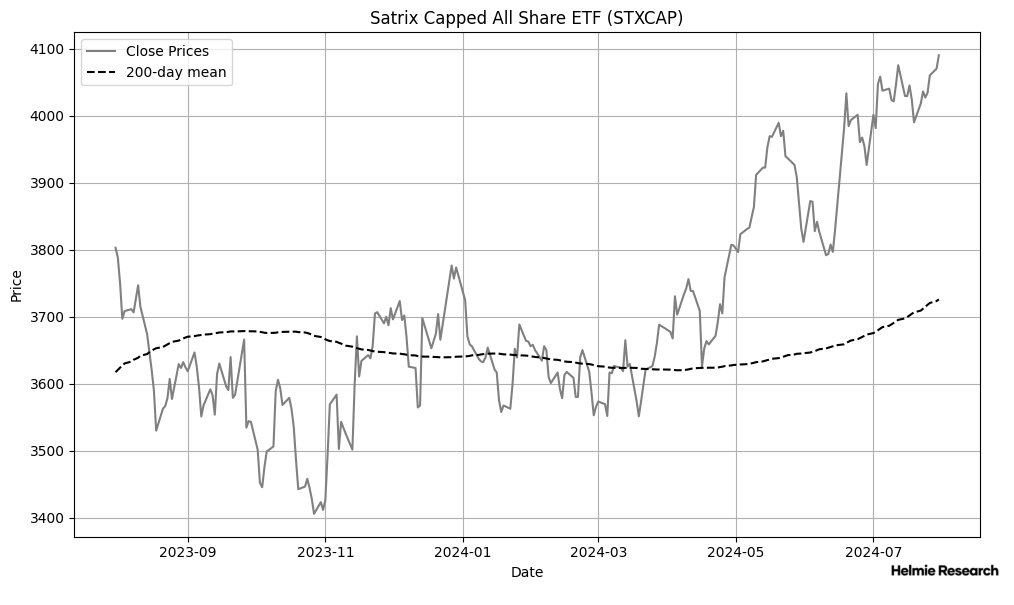

In [ ]:
%matplotlib inline

import pandas as pd
from datetime import datetime
import yfinance as yf
import yahooquery
import matplotlib.pyplot as plt
from PIL import Image

# Set length of history
#now = datetime.now().strftime("%Y-%m-%d")
start = '2022-06-01'
end = '2024-07-31'

# Get price history
data = yf.Ticker("STXCAP.JO")
index = data.history(start=start,
                     end=end)

# Covert Date Column to datetime
# Set Date Column as index
resetindex = index.reset_index(inplace = True)
index['Date'] = pd.to_datetime(index['Date']).dt.strftime('%Y-%m-%d')
index.set_index("Date", inplace=True)

# Save benchmark data
index.to_csv('/content/drive/MyDrive/STX.csv')

# Read benchmark data
# Load data from CSV (replace with your actual data)
index_data = pd.read_csv("/content/drive/MyDrive/STX.csv")  # Replace with your file

# Convert date column to datetime format
index_data['Date'] = pd.to_datetime(index_data['Date'])

# Extract relevant columns (date and close prices)
dates = index_data['Date']
close_prices = index_data['Close']

# Calculate the 200-day moving average
moving_average = close_prices.rolling(window=200).mean()

# Select the last 100 days
dates_last_100 = dates[-250:]
close_prices_last_100 = close_prices[-250:]
moving_average_last_100 = moving_average[-250:]

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(dates_last_100, close_prices_last_100, label='Close Prices', color='grey')
plt.plot(dates_last_100, moving_average_last_100, label='200-day mean', color='black', linestyle='--')

# Customize the chart
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Satrix Capped All Share ETF (STXCAP)")
plt.xticks(rotation=0)
plt.grid(True)
plt.legend()

# Add the logo
logo_path = "/content/drive/MyDrive/-j9g8q1.jpg"  # Replace with your logo file path
logo = Image.open(logo_path)
logo.thumbnail((200, 200))  # Resize the logo to fit in the corner

# Get the current figure and add a new axes for the logo
fig = plt.gcf()
newax = fig.add_axes([0.89, 0.0, 0.12, 0.1], anchor='SE', zorder=-1)
newax.imshow(logo)
newax.axis('off')


plt.tight_layout()
plt.show()

###Run XarData v0.1.0

In [ ]:
# @title
import pandas as pd
import xardata.jse_tickers as jt
import xardata.jse_data as jd
import xardata.process_data as jpd

my_access_key = 'e52cf3b93696352e880916f8c8adbf0c'

tickers = jt.get_tickers(my_access_key)

symbols = tickers
start = '2023-07-01'
end = '2024-07-17'

output_folder_path = '/content/jsestocks'

jd.get_data(symbols,
            start,
            end,
            output_folder_path)

jpd.clean('/content/jsestocks')

###data.py

In [ ]:
# @title

# databundle.py

import os
import requests
import json
import pandas as pd
import yfinance as yf

def get_tickers(api_token):
    """
    Fetches JSE stock tickers from an API and prepares them for further processing.

    Args:
        api_token (str): Your EOD Historical Data API token.

    Returns:
        list: List of JSE stock tickers with '.JO' suffix.
    """
    url = f'https://eodhd.com/api/exchange-symbol-list/JSE?api_token={api_token}&fmt=json'
    data = requests.get(url).json()

    # Serialize JSON data
    json_object = json.dumps(data, indent=4)
    with open("jse.json", "w") as outfile:
        outfile.write(json_object)

    # Read from JSON file
    with open('jse.json', 'r') as openfile:
        json_object = json.load(openfile)
    df = pd.json_normalize(json_object)

    # Create modified DataFrame
    df['tickers'] = df['Code'].astype(str) + '.JO'
    df = df[df['Code'].str.len() <= 3]

    # Extract tickers
    tickers = df['tickers'].tolist()
    return tickers

if __name__ == '__main__':
    # Example usage
    api_token = '668ec587b96b99.42475935'  # Replace with your actual API token
    tickers = get_tickers(api_token)
    print(f'JSE tickers: {tickers}')


def download(tickers, start_date, end_date, output_dir='Stocks'):
    """
    Downloads stock price data for a list of tickers and saves it to separate CSV files.

    Args:
        tickers (list): List of stock tickers (e.g., ['AAPL', 'MSFT', 'GOOGL']).
        start_date (str): Start date in 'YYYY-MM-DD' format.
        end_date (str): End date in 'YYYY-MM-DD' format.
        output_dir (str, optional): Directory to save CSV files. Defaults to 'Stocks'.
    """
    os.makedirs(output_dir, exist_ok=True)

    for stock in tickers:
        stock_data = yf.download(stock, start=start_date, end=end_date)
        df = pd.DataFrame(stock_data)

        # Parse the date column as datetime and set it as the index
        df['Date'] = pd.to_datetime(df.index)
        df.set_index('Date', inplace=True)

        csv_filename = os.path.join(output_dir, f'{stock}.csv')
        df.to_csv(csv_filename)
        print(f'Saved data for {stock} to {csv_filename}')

    print(f'All data saved in the "{output_dir}" directory.')

if __name__ == '__main__':
    # Example usage
    tickers = tickers
    start_date = '2022-06-01'
    end_date = '2024-07-30'
    download(tickers, start_date, end_date)

def save_tickers(folder_path):
    """
    Extracts unique tickers from CSV files in the hardcoded folder.

    Returns:
        pd.DataFrame: DataFrame with a single column 'tickers' containing unique tickers.
    """
    folder_path = '/content/drive/MyDrive/Raw'

    tickers = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            tickers.append(filename[:-4])

    unique_tickers = list(dict.fromkeys(tickers))
    df = pd.DataFrame(unique_tickers, columns=['tickers'])
    df.columns=df.iloc[1]
    df.to_csv(os.path.join(folder_path, 'tickers.csv'), index=False)
    print(f'Saved unique tickers to {folder_path}/tickers.csv')
    return df

if __name__ == '__main__':
    # Example usage
    folder_path = '/content/drive/MyDrive/Raw'
    df = save_tickers(folder_path)

In [ ]:

import os
import requests
import json
import pandas as pd
import yfinance as yf
import numpy as np
from scipy import stats
from pathlib import Path

def get_tickers(api_token):
    """
    Fetches JSE stock tickers from an API and prepares them for further processing.

    Args:
        api_token (str): Your EOD Historical Data API token.

    Returns:
        list: List of JSE stock tickers with '.JO' suffix.
    """
    url = f'https://eodhd.com/api/exchange-symbol-list/JSE?api_token={api_token}&fmt=json'
    data = requests.get(url).json()

    # Serialize JSON data
    json_object = json.dumps(data, indent=4)
    with open("jse.json", "w") as outfile:
        outfile.write(json_object)

    # Read from JSON file
    with open('jse.json', 'r') as openfile:
        json_object = json.load(openfile)
    df = pd.json_normalize(json_object)

    # Create modified DataFrame
    df['tickers'] = df['Code'].astype(str) + '.JO'
    df = df[df['Code'].str.len() <= 3]

    # Extract tickers
    tickers = df['tickers'].tolist()
    return tickers

if __name__ == '__main__':
    # Example usage
    api_token = '668ec587b96b99.42475935'  # Replace with your actual API token
    tickers = get_tickers(api_token)
    print(f'JSE tickers: {tickers}')


def download_and_process(tickers, start_date, end_date, output_dir='Stocks'):
    """
    Downloads stock price data for a list of tickers, processes it to handle outliers and missing data,
    and saves the cleaned data to separate CSV files.

    Args:
        tickers (list): List of stock tickers (e.g., ['AAPL', 'MSFT', 'GOOGL']).
        start_date (str): Start date in 'YYYY-MM-DD' format.
        end_date (str): End date in 'YYYY-MM-DD' format.
        output_dir (str, optional): Directory to save CSV files. Defaults to 'Stocks'.
    """
    os.makedirs(output_dir, exist_ok=True)

    for stock in tickers:
        stock_data = yf.download(stock, start=start_date, end=end_date)
        df = pd.DataFrame(stock_data)

        # Parse the date column as datetime and set it as the index
        df['Date'] = pd.to_datetime(df.index)
        df.set_index('Date', inplace=True)

        # Select OHLCV columns
        df = df[["Open", "High", "Low", "Close", "Adj Close", "Volume"]]

        # Remove outliers using z-score
        df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

        # Handle missing data
        df.fillna(method='ffill', inplace=True)  # Forward fill
        df.fillna(method='bfill', inplace=True)  # Backward fill

        # Save the cleaned data to a new CSV file
        csv_filename = os.path.join(output_dir, f'{stock}.csv')
        df.to_csv(csv_filename)
        print(f'Processed and saved cleaned data for {stock} to {csv_filename}')

    print(f'All data saved and processed in the "{output_dir}" directory.')

if __name__ == '__main__':
    # Example usage
    tickers = tickers
    start_date = '2022-06-01'
    end_date = '2024-07-31'
    download_and_process(tickers, start_date, end_date)

def save_tickers(folder_path):
    """
    Extracts unique tickers from CSV files in the specified folder.

    Args:
        folder_path (str): Path to the folder containing CSV files.

    Returns:
        pd.DataFrame: DataFrame with a single column 'tickers' containing unique tickers.
    """
    tickers = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            tickers.append(filename[:-4])

    unique_tickers = list(dict.fromkeys(tickers))
    df = pd.DataFrame(unique_tickers, columns=['tickers'])
    df.columns=df.iloc[1]
    df.to_csv(os.path.join(folder_path, 'tickers.csv'), index=False)
    print(f'Saved unique tickers to {folder_path}/tickers.csv')
    return df

if __name__ == '__main__':
    # Example usage
    folder_path = 'Stocks'
    df = save_tickers(folder_path)

JSE tickers: ['4SI.JO', 'ABG.JO', 'ACL.JO', 'ACS.JO', 'ACT.JO', 'ADH.JO', 'ADR.JO', 'ADW.JO', 'AEG.JO', 'AEL.JO', 'AFE.JO', 'AFH.JO', 'AFT.JO', 'AGL.JO', 'AHL.JO', 'AIL.JO', 'AIP.JO', 'AME.JO', 'AMS.JO', 'ANG.JO', 'ANH.JO', 'ANI.JO', 'APF.JO', 'APH.JO', 'APN.JO', 'APO.JO', 'ARA.JO', 'ARI.JO', 'ARL.JO', 'ART.JO', 'ASC.JO', 'ATT.JO', 'AVI.JO', 'AYO.JO', 'BAT.JO', 'BAW.JO', 'BCF.JO', 'BEL.JO', 'BHG.JO', 'BID.JO', 'BIK.JO', 'BKI.JO', 'BLU.JO', 'BRN.JO', 'BRT.JO', 'BTI.JO', 'BTN.JO', 'BVT.JO', 'BWN.JO', 'BYI.JO', 'CAA.JO', 'CAT.JO', 'CFR.JO', 'CGR.JO', 'CHP.JO', 'CKS.JO', 'CLH.JO', 'CLI.JO', 'CLS.JO', 'CMH.JO', 'CML.JO', 'CMO.JO', 'CND.JO', 'COH.JO', 'CPI.JO', 'CPP.JO', 'CPR.JO', 'CRP.JO', 'CSB.JO', 'CTA.JO', 'DCP.JO', 'DIB.JO', 'DNB.JO', 'DRA.JO', 'DRD.JO', 'DSY.JO', 'DTC.JO', 'ELI.JO', 'EMH.JO', 'EMI.JO', 'EMN.JO', 'ENX.JO', 'EOH.JO', 'EPE.JO', 'EPS.JO', 'EQU.JO', 'EUZ.JO', 'EXP.JO', 'EXX.JO', 'FBR.JO', 'FFB.JO', 'FGL.JO', 'FSR.JO', 'FTA.JO', 'FTB.JO', 'FTH.JO', 'GFI.JO', 'GLD.JO', 'GLN.J

[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for 4SI.JO to Stocks/4SI.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for ABG.JO to Stocks/ABG.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for ACL.JO to Stocks/ACL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for ACS.JO to Stocks/ACS.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for ACT.JO to Stocks/ACT.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for ADH.JO to Stocks/ADH.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for ADR.JO to Stocks/ADR.JO.csv
Processed and saved cleaned data for ADW.JO to Stocks/ADW.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for AEG.JO to Stocks/AEG.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for AEL.JO to Stocks/AEL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for AFE.JO to Stocks/AFE.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for AFH.JO to Stocks/AFH.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for AFT.JO to Stocks/AFT.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for AGL.JO to Stocks/AGL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for AHL.JO to Stocks/AHL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for AIL.JO to Stocks/AIL.JO.csv



<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for AIP.JO to Stocks/AIP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for AME.JO to Stocks/AME.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for AMS.JO to Stocks/AMS.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed


Processed and saved cleaned data for ANG.JO to Stocks/ANG.JO.csv
Processed and saved cleaned data for ANH.JO to Stocks/ANH.JO.csv


<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for ANI.JO to Stocks/ANI.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for APF.JO to Stocks/APF.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for APH.JO to Stocks/APH.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for APN.JO to Stocks/APN.JO.csv



<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for APO.JO to Stocks/APO.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for ARA.JO to Stocks/ARA.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for ARI.JO to Stocks/ARI.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for ARL.JO to Stocks/ARL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for ART.JO to Stocks/ART.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for ASC.JO to Stocks/ASC.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for ATT.JO to Stocks/ATT.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for AVI.JO to Stocks/AVI.JO.csv



<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed


Processed and saved cleaned data for AYO.JO to Stocks/AYO.JO.csv
Processed and saved cleaned data for BAT.JO to Stocks/BAT.JO.csv


<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for BAW.JO to Stocks/BAW.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for BCF.JO to Stocks/BCF.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for BEL.JO to Stocks/BEL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for BHG.JO to Stocks/BHG.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for BID.JO to Stocks/BID.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed


Processed and saved cleaned data for BIK.JO to Stocks/BIK.JO.csv


<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for BKI.JO to Stocks/BKI.JO.csv



<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for BLU.JO to Stocks/BLU.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for BRN.JO to Stocks/BRN.JO.csv



<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for BRT.JO to Stocks/BRT.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for BTI.JO to Stocks/BTI.JO.csv



<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for BTN.JO to Stocks/BTN.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for BVT.JO to Stocks/BVT.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for BWN.JO to Stocks/BWN.JO.csv
Processed and saved cleaned data for BYI.JO to Stocks/BYI.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for CAA.JO to Stocks/CAA.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for CAT.JO to Stocks/CAT.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for CFR.JO to Stocks/CFR.JO.csv
Processed and saved cleaned data for CGR.JO to Stocks/CGR.JO.csv

[*********************100%%**********************]  1 of 1 completed


<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for CHP.JO to Stocks/CHP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for CKS.JO to Stocks/CKS.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for CLH.JO to Stocks/CLH.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for CLI.JO to Stocks/CLI.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for CLS.JO to Stocks/CLS.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for CMH.JO to Stocks/CMH.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for CML.JO to Stocks/CML.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for CMO.JO to Stocks/CMO.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed


Processed and saved cleaned data for CND.JO to Stocks/CND.JO.csv
Processed and saved cleaned data for COH.JO to Stocks/COH.JO.csv


<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[********

Processed and saved cleaned data for CPI.JO to Stocks/CPI.JO.csv



<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for CPP.JO to Stocks/CPP.JO.csv



<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for CPR.JO to Stocks/CPR.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for CRP.JO to Stocks/CRP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for CSB.JO to Stocks/CSB.JO.csv



<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for CTA.JO to Stocks/CTA.JO.csv
Processed and saved cleaned data for DCP.JO to Stocks/DCP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for DIB.JO to Stocks/DIB.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for DNB.JO to Stocks/DNB.JO.csv
Processed and saved cleaned data for DRA.JO to Stocks/DRA.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for DRD.JO to Stocks/DRD.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for DSY.JO to Stocks/DSY.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for DTC.JO to Stocks/DTC.JO.csv
Processed and saved cleaned data for ELI.JO to Stocks/ELI.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for EMH.JO to Stocks/EMH.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for EMI.JO to Stocks/EMI.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for EMN.JO to Stocks/EMN.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for ENX.JO to Stocks/ENX.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for EOH.JO to Stocks/EOH.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for EPE.JO to Stocks/EPE.JO.csv
Processed and saved cleaned data for EPS.JO to Stocks/EPS.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for EQU.JO to Stocks/EQU.JO.csv
Processed and saved cleaned data for EUZ.JO to Stocks/EUZ.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for EXP.JO to Stocks/EXP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for EXX.JO to Stocks/EXX.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for FBR.JO to Stocks/FBR.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for FFB.JO to Stocks/FFB.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for FGL.JO to Stocks/FGL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for FSR.JO to Stocks/FSR.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for FTA.JO to Stocks/FTA.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for FTB.JO to Stocks/FTB.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for FTH.JO to Stocks/FTH.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for GFI.JO to Stocks/GFI.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for GLD.JO to Stocks/GLD.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for GLN.JO to Stocks/GLN.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for GML.JO to Stocks/GML.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for GND.JO to Stocks/GND.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for GPL.JO to Stocks/GPL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for GRT.JO to Stocks/GRT.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for GSH.JO to Stocks/GSH.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for HAR.JO to Stocks/HAR.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for HCI.JO to Stocks/HCI.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for HDC.JO to Stocks/HDC.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed


Processed and saved cleaned data for HIL.JO to Stocks/HIL.JO.csv


<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for HLM.JO to Stocks/HLM.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for HMN.JO to Stocks/HMN.JO.csv



<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for HUG.JO to Stocks/HUG.JO.csv



<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for HYP.JO to Stocks/HYP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for IMP.JO to Stocks/IMP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for INL.JO to Stocks/INL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for INP.JO to Stocks/INP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for ISA.JO to Stocks/ISA.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for ISB.JO to Stocks/ISB.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for ITE.JO to Stocks/ITE.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for IVT.JO to Stocks/IVT.JO.csv
Processed and saved cleaned data for JBL.JO to Stocks/JBL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for JSE.JO to Stocks/JSE.JO.csv



<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for KAL.JO to Stocks/KAL.JO.csv



<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for KAP.JO to Stocks/KAP.JO.csv



<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for KBO.JO to Stocks/KBO.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for KIO.JO to Stocks/KIO.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for KP2.JO to Stocks/KP2.JO.csv
Processed and saved cleaned data for KRO.JO to Stocks/KRO.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for KST.JO to Stocks/KST.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for LAB.JO to Stocks/LAB.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for LBR.JO to Stocks/LBR.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for LEW.JO to Stocks/LEW.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for LHC.JO to Stocks/LHC.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for LSK.JO to Stocks/LSK.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for LTE.JO to Stocks/LTE.JO.csv


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LUX.JO']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for LUX.JO to Stocks/LUX.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for MCG.JO to Stocks/MCG.JO.csv



<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed


Processed and saved cleaned data for MCZ.JO to Stocks/MCZ.JO.csv


<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for MDI.JO to Stocks/MDI.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for MFL.JO to Stocks/MFL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for MHB.JO to Stocks/MHB.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for MKR.JO to Stocks/MKR.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for MMP.JO to Stocks/MMP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for MNP.JO to Stocks/MNP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for MPT.JO to Stocks/MPT.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for MRF.JO to Stocks/MRF.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for MRP.JO to Stocks/MRP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for MSP.JO to Stocks/MSP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for MST.JO to Stocks/MST.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for MTA.JO to Stocks/MTA.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for MTH.JO to Stocks/MTH.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for MTM.JO to Stocks/MTM.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for MTN.JO to Stocks/MTN.JO.csv



<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for MTU.JO to Stocks/MTU.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for MUR.JO to Stocks/MUR.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for N91.JO to Stocks/N91.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for NCS.JO to Stocks/NCS.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for NED.JO to Stocks/NED.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for NPH.JO to Stocks/NPH.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for NPK.JO to Stocks/NPK.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for NPN.JO to Stocks/NPN.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for NRP.JO to Stocks/NRP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for NTC.JO to Stocks/NTC.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for NVS.JO to Stocks/NVS.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for NWL.JO to Stocks/NWL.JO.csv
Processed and saved cleaned data for NY1.JO to Stocks/NY1.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for OAO.JO to Stocks/OAO.JO.csv
Processed and saved cleaned data for OAS.JO to Stocks/OAS.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for OCE.JO to Stocks/OCE.JO.csv



<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for OCT.JO to Stocks/OCT.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for OMN.JO to Stocks/OMN.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for OMU.JO to Stocks/OMU.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for ORN.JO to Stocks/ORN.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for OUT.JO to Stocks/OUT.JO.csv



<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for PAN.JO to Stocks/PAN.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for PBG.JO to Stocks/PBG.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for PIK.JO to Stocks/PIK.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for PMR.JO to Stocks/PMR.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for PMV.JO to Stocks/PMV.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for PPC.JO to Stocks/PPC.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for PPE.JO to Stocks/PPE.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for PPH.JO to Stocks/PPH.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed


Processed and saved cleaned data for PPR.JO to Stocks/PPR.JO.csv


<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for PRX.JO to Stocks/PRX.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for QFH.JO to Stocks/QFH.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for QLT.JO to Stocks/QLT.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for RBX.JO to Stocks/RBX.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for RCL.JO to Stocks/RCL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed


Processed and saved cleaned data for RDF.JO to Stocks/RDF.JO.csv
Processed and saved cleaned data for REA.JO to Stocks/REA.JO.csv


<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for REB.JO to Stocks/REB.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for REM.JO to Stocks/REM.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for REN.JO to Stocks/REN.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for RES.JO to Stocks/RES.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for RFG.JO to Stocks/RFG.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for RHB.JO to Stocks/RHB.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for RLO.JO to Stocks/RLO.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for RMH.JO to Stocks/RMH.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for RNG.JO to Stocks/RNG.JO.csv



<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for RNI.JO to Stocks/RNI.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for RTN.JO to Stocks/RTN.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for RTO.JO to Stocks/RTO.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for S32.JO to Stocks/S32.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SAC.JO to Stocks/SAC.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SAP.JO to Stocks/SAP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SAR.JO to Stocks/SAR.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SBK.JO to Stocks/SBK.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SBP.JO to Stocks/SBP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for SCD.JO to Stocks/SCD.JO.csv
Processed and saved cleaned data for SDL.JO to Stocks/SDL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SDO.JO to Stocks/SDO.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SEA.JO to Stocks/SEA.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for SEB.JO to Stocks/SEB.JO.csv
Processed and saved cleaned data for SEP.JO to Stocks/SEP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for SFN.JO to Stocks/SFN.JO.csv
Processed and saved cleaned data for SHC.JO to Stocks/SHC.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SHG.JO to Stocks/SHG.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SHP.JO to Stocks/SHP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SLG.JO to Stocks/SLG.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SLM.JO to Stocks/SLM.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for SNT.JO to Stocks/SNT.JO.csv
Processed and saved cleaned data for SNV.JO to Stocks/SNV.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SOH.JO to Stocks/SOH.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SOL.JO to Stocks/SOL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SPG.JO to Stocks/SPG.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SPP.JO to Stocks/SPP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SRE.JO to Stocks/SRE.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SSK.JO to Stocks/SSK.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SSS.JO to Stocks/SSS.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SSU.JO to Stocks/SSU.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SSW.JO to Stocks/SSW.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SUI.JO to Stocks/SUI.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SUR.JO to Stocks/SUR.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SXM.JO to Stocks/SXM.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SYG.JO to Stocks/SYG.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SZK.JO to Stocks/SZK.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for TBS.JO to Stocks/TBS.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for TCP.JO to Stocks/TCP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for TEX.JO to Stocks/TEX.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for TFG.JO to Stocks/TFG.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for TGA.JO to Stocks/TGA.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for THA.JO to Stocks/THA.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for TKG.JO to Stocks/TKG.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for TLM.JO to Stocks/TLM.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for TMT.JO to Stocks/TMT.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for TON.JO to Stocks/TON.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for TPC.JO to Stocks/TPC.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for TRE.JO to Stocks/TRE.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for TRL.JO to Stocks/TRL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for TRU.JO to Stocks/TRU.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for TSG.JO to Stocks/TSG.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for TTO.JO to Stocks/TTO.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for UPL.JO to Stocks/UPL.JO.csv
Processed and saved cleaned data for VIS.JO to Stocks/VIS.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for VKE.JO to Stocks/VKE.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for VOD.JO to Stocks/VOD.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for VUN.JO to Stocks/VUN.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for WBC.JO to Stocks/WBC.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for WBO.JO to Stocks/WBO.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for WEZ.JO to Stocks/WEZ.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for WHL.JO to Stocks/WHL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for WKF.JO to Stocks/WKF.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for YRK.JO to Stocks/YRK.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for ZED.JO to Stocks/ZED.JO.csv


[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for ZZD.JO to Stocks/ZZD.JO.csv
All data saved and processed in the "Stocks" directory.
Saved unique tickers to Stocks/tickers.csv



<ipython-input-63-4d37985907ae>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-63-4d37985907ae>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


In [ ]:

import os
import glob

# Specify the path to the directory
path = '/content/drive/MyDrive/Stocks'

# Specify the file to exclude
exclude_file = 'tickers.csv'

# Use glob to find all CSV files in the directory
csv_files = glob.glob(os.path.join(path, '*.csv'))

# Filter out the specific file
csv_files = [file for file in csv_files if os.path.basename(file) != exclude_file]

# Count the number of CSV files
csv_count = len(csv_files)

print(f'There are {csv_count} CSV files in the folder, excluding {exclude_file}.')

There are 264 CSV files in the folder, excluding tickers.csv.


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned data
df = pd.read_csv('/content/drive/MyDrive/Raw/OAO.JO.csv')


# Visualize the data
plt.figure(figsize=(20, 15))
df.hist(bins=50, figsize=(20, 15))
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Close Price Over Time')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['Close'])
plt.title('Scatter Plot of Close Prices')
plt.show()

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [ ]:
# Inspect the DataFrame
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Raw/OAO.JO.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Stocks/OAO.JO.csv')

In [ ]:
print(df.info())
print(df2.info())

###ranker.py

In [ ]:

import os
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.stats import linregress

#Make a variable for this is Settings

ranking_day = '2024-07-30'


# Define the directory containing the CSV files
data_dir = '/content/drive/MyDrive/Stocks'

# Read tickers from the 'tickers.csv' file
tickers_df = pd.read_csv(os.path.join(data_dir, 'tickers.csv'), header=None)
tickers = tickers_df[0].tolist()

# Create a dictionary to store stock data
stock_data = {}
for ticker in tickers:
    stock_data[ticker] = pd.read_csv(os.path.join(data_dir, f"{ticker}.csv"),
                                     parse_dates=True, index_col=0)['Close']

# Create a DataFrame from the dictionary
stocks = pd.DataFrame(stock_data)

# Remove duplicate columns
stocks = stocks.loc[:, ~stocks.columns.duplicated()]

# Calculate momentum
def momentum(closes):
    log_returns = np.log(closes)
    x = np.arange(len(log_returns))
    # Use linregress for consistency with previous code and to get rvalue
    slope, _, rvalue, _, _ = linregress(x, log_returns)
    annualized_slope = (1 + slope) ** 252
    momentum_score = annualized_slope * (rvalue ** 2)
    return momentum_score

momentums = stocks.copy(deep=True)
for ticker in tickers:
    momentums[ticker] = stocks[ticker].rolling(90).apply(momentum, raw=False)

# Rank stocks by momentum - sort by the values in the dataframe on the date provided in the 'ranking_day' variable
result = momentums.sort_values(by=momentums.index[-1], axis=1, ascending=False)
# Filter the result to only include rows where the date index is greater than or equal to the ranking day
res = result[~(result.index < pd.to_datetime(ranking_day))].dropna(axis=1)

# Reset the index to make 'Date' a column # This is the key change
res = res.reset_index()

# Prepare DataFrame for final results
# Use the tickers list as the value_vars since they are now columns in the DataFrame
finalframe = res.melt(id_vars=['Date'], value_vars=res.columns[1:], var_name='symbol', value_name='momentum_score')
finalframe['momentum_score'] = finalframe['momentum_score'].astype(float)
finalframe['rank'] = finalframe['momentum_score'].rank(ascending=False)

# Filter out rows with momentum score < 0.001
finalframe = finalframe[finalframe['momentum_score'] >= 0.001]

# Reset the index
finalframe.reset_index(drop=True, inplace=True)

# Filter out low-ranked stocks (rank >= 50)
finalframe = finalframe[finalframe['rank'] < 50]

# Function to get company name from ticker
def get_company_name(ticker):
    try:
        stock = yf.Ticker(ticker)
        return stock.info['longName']
    except KeyError:
        return None

# Add a new column with company names
finalframe['company'] = finalframe['symbol'].apply(get_company_name)

finalframe = finalframe.iloc[:, [0,4,1,2,3]]
finalframe = finalframe.sort_values(by='rank')
finalframe.to_csv('/content/drive/MyDrive/ranking_list.csv')

In [ ]:
# @title
top=finalframe.head(10).set_index("Date")

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Create your DataFrame (replace with your actual data)
# df = pd.DataFrame({'A': [1, 2, 3, 4], 'B': ['A', 'B', 'C', 'D']})

# Create a table plot without axes
fig, ax = plt.subplots()
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = plt.table(cellText=top.values, colLabels=top.columns, loc='center', cellLoc='center', bbox=[0, 0, 1, 1])

# Adjust the font size
table.auto_set_font_size(False)
table.set_fontsize(8)

# Adjust column widths to fit the values
table.auto_set_column_width(col=list(range(len(top.columns))))

# Save the plot as a PNG
plt.savefig('top10_29Jul2024.png', dpi=300)  # Adjust dpi for higher resolution
plt.show()

###metrics.py

In [ ]:

import os
import pandas as pd
import numpy as np

def calculate_metrics_and_add_columns(original_df, data_folder, portfolio_value):
    """
    Calculates 20-day volatility, 100-day mean, and 90-day rate of return for each stock
    and adds the results as columns to the original DataFrame.

    Args:
        original_df (pd.DataFrame): Original DataFrame with columns 'Date', 'symbol', 'rank', 'momentum_score'.
        data_folder (str): Path to the folder containing stock data CSV files.
        portfolio_value (float): Total value of the portfolio.

    Returns:
        pd.DataFrame: Updated DataFrame with additional columns.
    """
    result_df = original_df.copy()  # Create a copy to avoid modifying the original DataFrame

    result_df['Date'] = pd.to_datetime(result_df['Date'])

    # Loop through each ticker in the DataFrame
    for ticker in result_df['symbol']:
        filepath = os.path.join(data_folder, f"{ticker}.csv")

        # Read CSV data (adjust column names as needed)
        stock_data = pd.read_csv(filepath, parse_dates=['Date'], index_col='Date')

        # Calculate daily returns
        stock_data['daily_return'] = stock_data['Close'].pct_change()

        # Compute 20-day volatility
        stock_data['20_day_volatility'] = stock_data['daily_return'].rolling(window=20).std() * np.sqrt(20)

        # Compute 100-day mean
        stock_data['100_day_mean'] = stock_data['Close'].rolling(window=100).mean()

        # Compute 90-day rate of return
        stock_data['90_day_return'] = (stock_data['Close'].pct_change(periods=90) + 1).pow(1 / 90) - 1

        # Ensure the date exists in stock_data
        if '2024-07-30' in stock_data.index:
            # Add the calculated values to the result_df
            result_df.loc[result_df['symbol'] == ticker, ['20_day_volatility', '100_day_mean', '90_day_return']] = \
                stock_data.loc['2024-07-30', ['20_day_volatility', '100_day_mean', '90_day_return']].values

            # Add the 'close' column
            result_df.loc[result_df['symbol'] == ticker, 'Close'] = stock_data.loc['2024-07-30', 'Close']

    # Replace any remaining NaN values in '20_day_volatility' with a small number to avoid division by zero
    result_df['20_day_volatility'].replace(0, np.nan, inplace=True)
    result_df['20_day_volatility'].fillna(1e-10, inplace=True)

    # Calculate inverse volatility
    inv_vol = 1 / result_df["20_day_volatility"]
    sum_inv_vol = inv_vol.sum()
    vol_targets = inv_vol / sum_inv_vol
    result_df["weight"] = vol_targets

    # Add a boolean column indicating if close > 100_day_mean
    result_df['stock_trend'] = result_df['Close'] > result_df['100_day_mean']

    # Read index data from a CSV file (adjust filename and column names)
    index_data = pd.read_csv("/content/drive/MyDrive/STX.csv", parse_dates=['Date'], index_col='Date')

    # Calculate 200-day SMA for the index
    index_data['index_mean'] = index_data['Close'].rolling(window=200).mean()

    # Add a boolean column indicating if close > 200-day_mean
    index_data['market_trend'] = index_data['Close'] > index_data['index_mean']


    # Calculate position weight
    stockprice = result_df["Close"] / 100
    pos_weight = portfolio_value * result_df["weight"]
    result_df["units"] = pos_weight / stockprice
    result_df["ZAR"] = stockprice * result_df["units"]

    # Merge index data with result_df based on date (adjust column names)
    merged_df = pd.merge(result_df,
                         index_data[['index_mean', 'market_trend']],
                         left_on='Date',
                         right_index=True,
                         how='left')

    merged_df.to_csv('/content/drive/MyDrive/ranked_list_31Jul2024.csv')

    # Drop rows where boolean value is False and '90_day_return' >= 0.15
    merged_df = merged_df.drop(merged_df[(merged_df['stock_trend'] == False) |
                                         (merged_df['90_day_return'] >= 0.15)].index)

    merged_df = merged_df.loc[:, ~merged_df.columns.str.contains('^Unnamed')]

    merged_df = merged_df.iloc[:, [0, 1, 2, 3, 4, 8, 5, 7, 6, 13, 10, 14, 9, 11, 12]]

    merged_df.to_csv('/content/drive/MyDrive/initial_portfolio_31Jul2024.csv')


    return merged_df

# Example usage:
original_df = pd.read_csv("/content/drive/MyDrive/ranking_list.csv")  # Replace with your actual data
data_folder = "/content/drive/MyDrive/Stocks"  # Path to your stock data folder
portfolio_value = 125435.26  # Example portfolio value

updated_df = calculate_metrics_and_add_columns(original_df, data_folder, portfolio_value)

# Display the merged DataFrame
updated_df

,Date,company,symbol,momentum_score,rank,Close,20_day_volatility,90_day_return,100_day_mean,index_mean,stock_trend,market_trend,weight,units,ZAR
1,2024-07-30,Tharisa plc,THA.JO,2.547305,2.0,1931.0,0.091523,0.005384,1678.43,3725.939064,True,True,0.018440,119.783492,2313.019230
2,2024-07-30,The SPAR Group Ltd,SPP.JO,2.534313,3.0,12500.0,0.046400,0.004086,10366.94,3725.939064,True,True,0.036372,36.498776,4562.347059
3,2024-07-30,Wilson Bayly Holmes-Ovcon Limited,WBO.JO,2.316744,4.0,17876.0,0.057355,0.003179,14987.42,3725.939064,True,True,0.029425,20.647344,3690.919165
4,2024-07-30,The Foschini Group Limited,TFG.JO,2.165664,5.0,13500.0,0.055310,0.003063,11060.00,3725.939064,True,True,0.030513,28.351340,3827.430910
5,2024-07-30,Copper 360 Limited,CPR.JO,2.002542,6.0,413.0,0.103027,0.005112,386.26,3725.939064,True,True,0.016381,497.513817,2054.732066
6,2024-07-30,Grindrod Limited,GND.JO,1.765146,7.0,1573.0,0.037333,0.002855,1377.60,3725.939064,True,True,0.045206,360.481213,5670.369486
7,2024-07-30,Mr Price Group Limited,MRP.JO,1.717631,8.0,21230.0,0.061923,0.002258,18509.54,3725.939064,True,True,0.027254,16.102986,3418.663848
8,2024-07-30,Randgold & Exploration Company Limited,RNG.JO,1.715443,9.0,73.0,0.251327,0.003993,65.29,3725.939064,True,True,0.006715,1153.840822,842.303800
9,2024-07-30,Trellidor Holdings Limited,TRL.JO,1.700329,10.0,168.0,0.292821,0.001637,160.33,3725.939064,True,True,0.005764,430.325519,722.946871
10,2024-07-30,Truworths International Limited,TRU.JO,1.543763,11.0,8911.0,0.071364,0.001206,8213.76,3725.939064,True,True,0.023649,33.289261,2966.406009


In [ ]:

pip install dataframe_image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.7/385.7 kB 24.0 MB/s eta 0:00:00


DataFrame saved as 'Top10holdings.jpg'


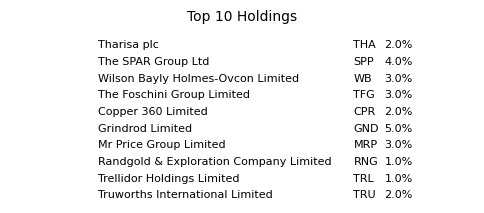

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming updated_df is already in memory
# Select the columns you want to keep
selected_columns = ['company', 'symbol', 'weight']
new_df = updated_df[selected_columns].copy()

# Remove the '. JO' suffix from the 'symbol' column
new_df['symbol'] = new_df['symbol'].str.rstrip('. JO')

# Select the top 10 rows
new_df = new_df.head(10)

# Round the 'weight' column and convert to percentages
new_df['weight'] = new_df['weight'].round(2) * 100
new_df['weight'] = new_df['weight'].astype(str) + '%'

# Create a figure and axis with a narrower width
fig, ax = plt.subplots(figsize=(6, 2))  # Adjust the size as needed

# Add a title
plt.title('Top 10 Holdings', fontsize=10, pad=10)

# Hide the axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create a table without headers
table = ax.table(cellText=new_df.values, colLabels=['']*len(new_df.columns), cellLoc='left', loc='center')

# Adjust the font size and alignment
table.auto_set_font_size(False)
table.set_fontsize(8)
table.auto_set_column_width(col=list(range(len(new_df.columns))))

# Remove the borderlines from the table
for key, cell in table.get_celld().items():
    cell.set_linewidth(0)

# Save the table as a high-quality JPEG image
plt.savefig('Top10holdings.jpg', bbox_inches='tight', pad_inches=0.1, dpi=300)

print("DataFrame saved as 'Top10holdings.jpg'")

DataFrame saved as 'Top10holdings.jpg'


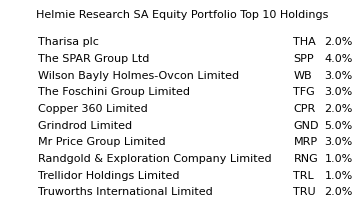

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming updated_df is already in memory
# Select the columns you want to keep
selected_columns = ['company', 'symbol', 'weight']
new_df = updated_df[selected_columns].copy()

# Remove the '. JO' suffix from the 'symbol' column
new_df['symbol'] = new_df['symbol'].str.rstrip('. JO')

# Select the top 10 rows
new_df = new_df.head(10)

# Round the 'weight' column and convert to percentages
new_df['weight'] = new_df['weight'].round(2) * 100
new_df['weight'] = new_df['weight'].astype(str) + '%'

# Create a figure and axis with a narrower width
fig, ax = plt.subplots(figsize=(4, 2))  # Adjust the size as needed

# Add a title
plt.title('Helmie Research SA Equity Portfolio Top 10 Holdings', fontsize=8, pad=10)

# Hide the axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create a table without headers
table = ax.table(cellText=new_df.values, colLabels=['']*len(new_df.columns), cellLoc='left', loc='center')

# Adjust the font size and alignment
table.auto_set_font_size(False)
table.set_fontsize(8)
table.auto_set_column_width(col=list(range(len(new_df.columns))))

# Remove the borderlines from the table
for key, cell in table.get_celld().items():
    cell.set_linewidth(0)

# Save the table as a high-quality JPEG image
plt.savefig('Top10holdings.jpg', bbox_inches='tight', pad_inches=0.1, dpi=100)

print("DataFrame saved as 'Top10holdings.jpg'")

<ipython-input-31-c0ed89a4fae7>:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


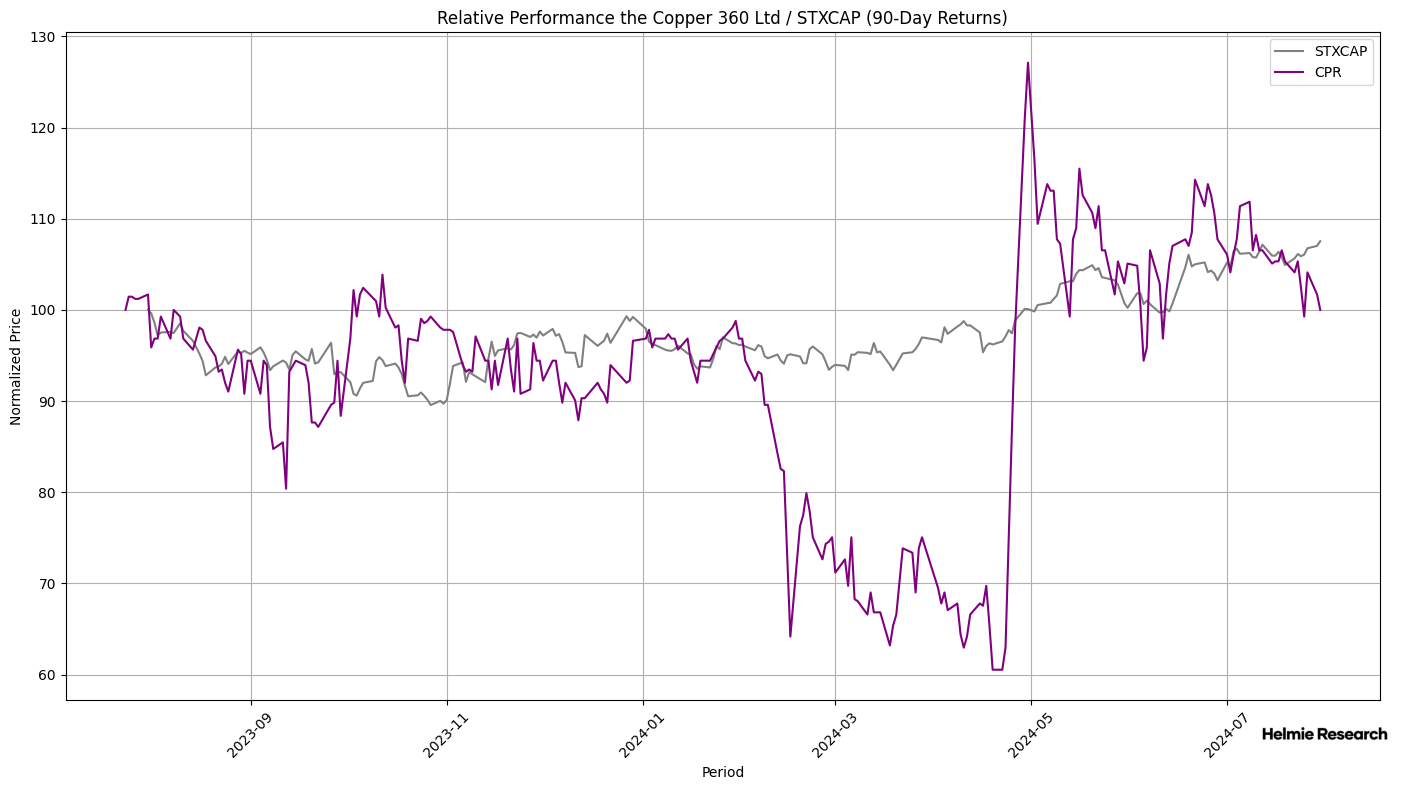

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
# Load the first dataset
stock1 = pd.read_csv("/content/drive/MyDrive/STX.csv")  # Replace with your file
stock1['Date'] = pd.to_datetime(stock1['Date'])
stock1.set_index('Date', inplace=True)
stock1 = stock1.tail(250)  # Restrict to the last 90 data points
stock1['Normalized'] = stock1['Close'] / stock1['Close'].iloc[0] * 100
stock1['200-day MA'] = stock1['Close'].rolling(window=200).mean() / stock1['Close'].iloc[0] * 100

# Load the second dataset
stock2 = pd.read_csv("/content/drive/MyDrive/Stocks/CPR.JO.csv")  # Replace with your file
stock2['Date'] = pd.to_datetime(stock2['Date'])
stock2.set_index('Date', inplace=True)
stock2 = stock2.tail(250)  # Restrict to the last 90 data points
stock2['Normalized'] = stock2['Close'] / stock2['Close'].iloc[0] * 100
stock2['100-day MA'] = stock2['Close'].rolling(window=100).mean() / stock2['Close'].iloc[0] * 100

# Plot the data
plt.figure(figsize=(14, 8))
plt.plot(stock1.index, stock1['Normalized'], label='STXCAP', color='grey')
#plt.plot(stock1.index, stock1['200-day MA'], label='STXCAP 200-day mean', color='blue', linestyle='--')
plt.plot(stock2.index, stock2['Normalized'], label='CPR', color='purple')
#plt.plot(stock2.index, stock2['100-day MA'], label='SPP 100-day mean', color='orange', linestyle='--')

# Customize the chart
plt.xlabel("Period")
plt.ylabel("Normalized Price")
plt.title("Relative Performance the Copper 360 Ltd / STXCAP (90-Day Returns)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Add the logo
logo_path = "/content/drive/MyDrive/-j9g8q1.jpg"  # Replace with your logo file path
logo = Image.open(logo_path)
logo.thumbnail((5000, 5000))  # Resize the logo to fit in the corner

# Get the current figure and add a new axes for the logo

fig = plt.gcf()
newax = fig.add_axes([0.90, 0.0, 0.1, 0.1], anchor='NW', zorder=-1)
newax.imshow(logo)
newax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
print (updated_df['weight'].sum())
print (updated_df['units'].sum())
print (updated_df['ZAR'].sum())

0.9089436052566627
16738.9479199906
114013.57745070686


In [ ]:


# Save the DataFrame to an Excel file
updated_df.to_excel('/content/drive/MyDrive/initial_portfolio_31Jul2024.xlsx', index=False)  # Replace with your desired file path

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# df = your_existing_dataframe

# Create a plot
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the size as needed
ax.axis('tight')
ax.axis('off')

# Create the table with a larger font size
table = ax.table(cellText=updated_df.values, colLabels=updated_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(2.5)  # Adjust the font size as needed

# Save the plot as a high-resolution image
plt.savefig('portfolio29Jul2024.png', dpi=300)  # Adjust dpi for higher resolution
plt.show()

In [ ]:

import pandas as pd

# Read the CSV file into a DataFrame
filename = '/content/drive/MyDrive/initial_portfolio_05Aug2024.csv'
cols = ['symbol', 'stock_trend', '90_day_return']
df = pd.read_csv(filename, usecols=cols)

# Convert the DataFrame to a dictionary
data_ranking = df.to_dict(orient='list')

current_ranking_table = pd.DataFrame(data_ranking)

# Read the CSV file into a DataFrame
filename2 = '/content/drive/MyDrive/initial_portfolio_29Jul2024.csv'
cols2 = ['symbol', 'company', 'stock_trend', '90_day_return']
df2 = pd.read_csv(filename2, usecols=cols2)

# Convert the DataFrame to a dictionary
data_portfolio = df2.to_dict(orient='list')

cpf = pd.DataFrame(data_portfolio)

# Identify stocks to sell based on stock trend
sell_list = current_ranking_table[~current_ranking_table["stock_trend"]]

# Drop stocks with a 90-day return greater than or equal to 15%
index_names1 = current_ranking_table[(current_ranking_table["90_day_return"] >= 15)].index
current_ranking_table.drop(index_names1, inplace=True)

# List of disqualified tickers
dqs = sell_list["symbol"].tolist()

# Identify stocks to liquidate
liquidate = cpf.loc[cpf['symbol'].isin(dqs)].reset_index(drop=True)

# Remove disqualified stocks from the portfolio
newpf = cpf[~cpf['symbol'].isin(liquidate['symbol'])]

# Remove stocks that are not in the current ranking table
ineligible = newpf[~newpf['symbol'].isin(current_ranking_table['symbol'])]

# Get tickers to remove
remove = ineligible['symbol'].tolist()

# Create a new portfolio without removed stocks
rebalanced = newpf[~newpf['symbol'].isin(ineligible['symbol'])]

# Get symbols for rebalancing
rebalance = rebalanced["symbol"].tolist()


# Identify qualified stocks to buy (in current ranking table but not in cpf)
qualified_to_buy = current_ranking_table[~current_ranking_table['symbol'].isin(cpf['symbol'])]

# Remove duplicates from the qualified_to_buy list
qualified_to_buy_unique = list(set(qualified_to_buy['symbol']))

updated_list = rebalance + qualified_to_buy_unique

# Print relevant information
print(f"Sell declining stocks: {liquidate['symbol'].tolist()}")
print(f"Sell disqualified stocks: {ineligible['symbol'].tolist()}")
print(f"Portfolio after liquidation: {rebalanced['symbol'].tolist()}")

print(f"Buy: {qualified_to_buy_unique}")

print(f"Portfolio after rebalance: {updated_list}")

In [ ]:

selldf = pd.read_csv('/content/drive/MyDrive/initial_portfolio_29Jul2024.csv')


# Drop rows where 'Name' is not in the list
sell = selldf[selldf['symbol'].isin(remove)]
#sell = sell.iloc[::]
sell = sell.drop(columns=['Unnamed: 0'])

sell

In [ ]:
# Calculate position weight

new_portfolio_value = 1004058.00

stockprice2 = mypf["Close"]
new_pos_weight = new_portfolio_value * mypf["weight"]
mypf["units"] = new_pos_weight / stockprice2
mypf["ZAR"] = stockprice2 * mypf["units"]
mypf

In [ ]:
# Drop rows where 'Name' is not in the list
buy = mypf[~mypf['symbol'].isin(rebalance)]
buy = buy.iloc[0::]
buy =buy.drop(columns=['Unnamed: 0'])

buy

In [ ]:


oldpf = pd.read_csv('/content/drive/MyDrive/initial_portfolio_29Jul2024.csv')

# Drop rows where 'Name' is not in the list
filtered = oldpf[~oldpf['symbol'].isin(remove)]
filtered = filtered.iloc[0::]
filtered =filtered.drop(columns=['Unnamed: 0'])

name_list = filtered['symbol'].tolist()


# Round the values in column 'A' to 2 decimal places
filtered['units'] = filtered['units'].round(2)

filtered.reset_index(inplace=True)
filtered.set_index('Date')


# Drop rows where 'Name' is not in the list
rb = mypf[mypf['symbol'].isin(rebalance)]
rb = rb.iloc[0::]
rb =rb.drop(columns=['Unnamed: 0'])

# Round the values in column 'A' to 2 decimal places
rb['units'] = rb['units'].round(2)

rb.reset_index(inplace=True)


# Reindex the DataFrame
df_reindexed = rb.set_index('symbol').reindex(name_list).reset_index()

df_reindexed["buy/sell"] = df_reindexed["units"] - filtered["units"]
df_reindexed.set_index('Date', inplace=True)
df_reindexed

In [ ]:

# Concatenate along rows (axis=0)
result = pd.concat([buy, rb], axis=0)
result

In [ ]:
print(result['units'].sum())

#Test

                    Date  Cumulative Balance     Return
1481 2023-08-02 00:00:00             4923.80        NaN
1476 2023-08-15 12:28:46             9654.36  96.075389
1477 2023-08-15 12:28:46             9642.53  -0.122535
1480 2023-08-15 12:28:46             9640.22  -0.023956
1479 2023-08-15 12:28:46             9640.21  -0.000104


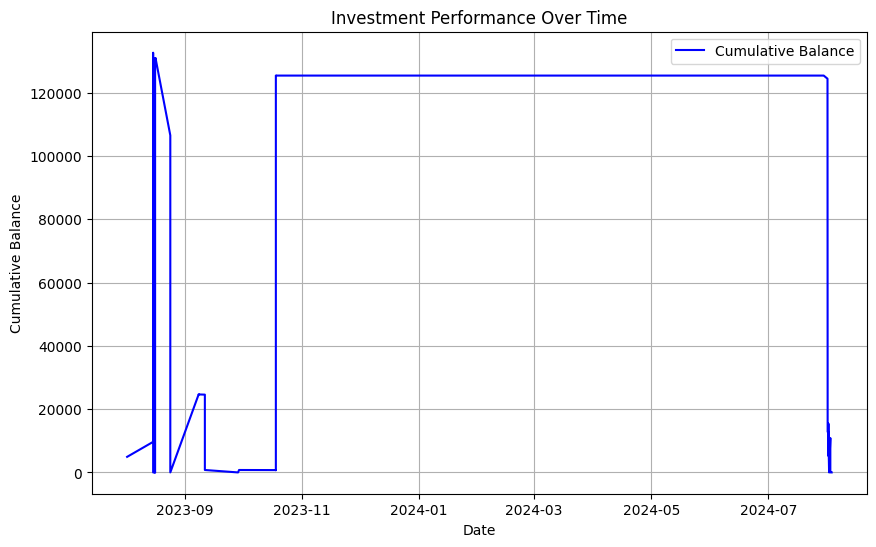

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/Transaction History Report 8_2_2024 5_25_21 PM.xlsx'
df = pd.read_excel(file_path)

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataframe by date
df = df.sort_values(by='Date')

# Calculate the cumulative account balance
df['Cumulative Balance'] = df['Debit/Credit'].cumsum()

# Calculate daily returns as percentage change
df['Return'] = df['Cumulative Balance'].pct_change() * 100

# Print the DataFrame to see the calculated cumulative balance and returns
print(df[['Date', 'Cumulative Balance', 'Return']].head())

# Plot the performance chart
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Cumulative Balance'], label='Cumulative Balance', color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Balance')
plt.title('Investment Performance Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
final_buy_list2.ticker = final_buy_list2.ticker+ '.JO'
Tickers = final_buy_list2["ticker"].tolist()

In [ ]:
import yfinance as yf
import pandas as pd

df = pd.DataFrame()
for stock in Tickers :
  info = yf.Ticker(stock).info
  #industry = info.get('industry')
  #beta = info.get('beta')
  sector = info.get('sector')
  df = df.append({'Stock':stock, 'Sector':sector}, ignore_index=True)

df

In [ ]:
final_buy_list2.set_index('ticker', inplace=True)
df.set_index('Stock', inplace=True)
f_column = df["Sector"]
data1 = pd.concat([final_buy_list2 ,df], axis = 1)
data1

In [ ]:
data1['weight'].sum()

In [ ]:
new_dataset = data1.loc[:, ['Sector','weight']]
#new_dataset.set_index("Sector",inplace=True)
new_dataset.loc[len(new_dataset.index)] = ['Cash', pct_cash_frp]
new_dataset

In [ ]:
new_dataset["weight"].sum()

In [ ]:
new_dataset.groupby(['Sector']).sum().plot(kind='pie', y='weight', autopct='%1.0f%%')

plt.tight_layout()

# We save the graph in jpg format
plt.savefig("my_graph.jpg")
plt.show()

In [ ]:

dataset = new_dataset
# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(dataset).mark_bar().encode(
  #x='sum(weight)',
  #y='Sector',
  color='Sector'
)

In [ ]:
Absa = pd.read_csv('/content/drive/MyDrive/Stocks/ABG.JO.csv')

In [ ]:
Absa

In [ ]:
RankingTable08092023 = pd.read_csv("/content/ranking_table130923.csv")
RankingTable08092023

In [ ]:
Portfolio = pd.read_csv("/content/portfolio130923.csv")
Portfolio